# EDA AND DATA CLEANING - DATAFRAME DATASET 

In [222]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.preprocessing import minmax_scaling
from scipy import stats
%matplotlib inline
import seaborn as sns
import datetime 
import missingno as msno

In [223]:
df = pd.read_csv(r'/Users/apple/Documents/GitHub/Prediction-of-Stock-Price-Movement-based-on-trading-DS-II/Datasets/DataFrame.csv')
df.head()

,Type,Date,Time,open,high,low,close,Unnamed: 7
0,NIFTY,20210101,09:16,13997.90,14020.85,13991.35,14013.15,NaN
1,NIFTY,20210101,09:17,14014.85,14018.55,14008.15,14009.05,NaN
2,NIFTY,20210101,09:18,14008.05,14013.10,14005.05,14012.70,NaN
3,NIFTY,20210101,09:19,14013.65,14019.10,14013.65,14016.20,NaN
4,NIFTY,20210101,09:20,14015.45,14017.80,14011.95,14015.45,NaN


In [224]:
df.shape

(22805, 8)

In [225]:
df.dtypes


Type           object
Date            int64
Time           object
open          float64
high          float64
low           float64
close         float64
Unnamed: 7    float64
dtype: object

In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22805 entries, 0 to 22804
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Type        22805 non-null  object 
 1   Date        22805 non-null  int64  
 2   Time        22805 non-null  object 
 3   open        22805 non-null  float64
 4   high        22805 non-null  float64
 5   low         22805 non-null  float64
 6   close       22805 non-null  float64
 7   Unnamed: 7  0 non-null      float64
dtypes: float64(5), int64(1), object(2)
memory usage: 1.4+ MB


In [227]:
#statistics of dataset
df.describe(include='all')

,Type,Date,Time,open,high,low,close,Unnamed: 7
count,22805,2.280500e+04,22805,22805.000000,22805.000000,22805.000000,22805.000000,0.0
unique,1,NaN,457,NaN,NaN,NaN,NaN,NaN
top,NIFTY,NaN,09:43,NaN,NaN,NaN,NaN,NaN
freq,22805,NaN,61,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.021022e+07,NaN,14703.322396,14707.486481,14699.102201,14703.260816,NaN
std,NaN,8.285616e+01,NaN,391.377498,391.265231,391.551643,391.366248,NaN
min,NaN,2.021010e+07,NaN,13604.750000,13614.400000,13596.750000,13602.800000,NaN
25%,NaN,2.021012e+07,NaN,14462.250000,14465.950000,14458.050000,14461.950000,NaN
50%,NaN,2.021022e+07,NaN,14739.500000,14743.000000,14735.850000,14739.450000,NaN
75%,NaN,2.021031e+07,NaN,15037.000000,15041.250000,15032.500000,15036.850000,NaN


In [228]:
df.isnull().sum()

Type              0
Date              0
Time              0
open              0
high              0
low               0
close             0
Unnamed: 7    22805
dtype: int64

In [229]:
df.drop(columns=['Unnamed: 7'], inplace=True)
df.isnull().sum()

Type     0
Date     0
Time     0
open     0
high     0
low      0
close    0
dtype: int64

In [230]:
# drop duplicates based on an subset of variables
key = ['Date', 'Time', 'open', 'high', 'low', 'close']
df_dedupped2 = df.drop_duplicates(subset=key)

print(df.shape)
print(df_dedupped2.shape)

(22805, 7)
(22805, 7)


In [231]:
df['Date'] = pd.to_datetime(df['Date'] , format = "%Y%m%d")
df.head()

,Type,Date,Time,open,high,low,close
0,NIFTY,2021-01-01,09:16,13997.90,14020.85,13991.35,14013.15
1,NIFTY,2021-01-01,09:17,14014.85,14018.55,14008.15,14009.05
2,NIFTY,2021-01-01,09:18,14008.05,14013.10,14005.05,14012.70
3,NIFTY,2021-01-01,09:19,14013.65,14019.10,14013.65,14016.20
4,NIFTY,2021-01-01,09:20,14015.45,14017.80,14011.95,14015.45


In [232]:
df["Weekday"]=pd.to_datetime(df["Date"].astype("str")).dt.weekday
df["Dayname"]=pd.to_datetime(df["Date"].astype("str")).dt.day_name()
year=[]
month=[]
date = []
for i in df['Date'].astype("str"):
    k=i.strip()
    year.append(k.split("-")[0])
    month.append(k.split("-")[1])
    date.append(k.split("-")[2])

df["Year"] = year
df["Month"] = month
df["Dates"] = date

time_hr = []
time_min = []

for i in df['Time']:
    k = i.strip()
    time_hr.append(k.split(":")[0])
    time_min.append(k.split(":")[1])
df["Hour"] = time_hr
df["Min"] = time_min
df.head()

,Type,Date,Time,open,high,low,close,Weekday,Dayname,Year,Month,Dates,Hour,Min
0,NIFTY,2021-01-01,09:16,13997.90,14020.85,13991.35,14013.15,4,Friday,2021,01,01,09,16
1,NIFTY,2021-01-01,09:17,14014.85,14018.55,14008.15,14009.05,4,Friday,2021,01,01,09,17
2,NIFTY,2021-01-01,09:18,14008.05,14013.10,14005.05,14012.70,4,Friday,2021,01,01,09,18
3,NIFTY,2021-01-01,09:19,14013.65,14019.10,14013.65,14016.20,4,Friday,2021,01,01,09,19
4,NIFTY,2021-01-01,09:20,14015.45,14017.80,14011.95,14015.45,4,Friday,2021,01,01,09,20


<AxesSubplot:>

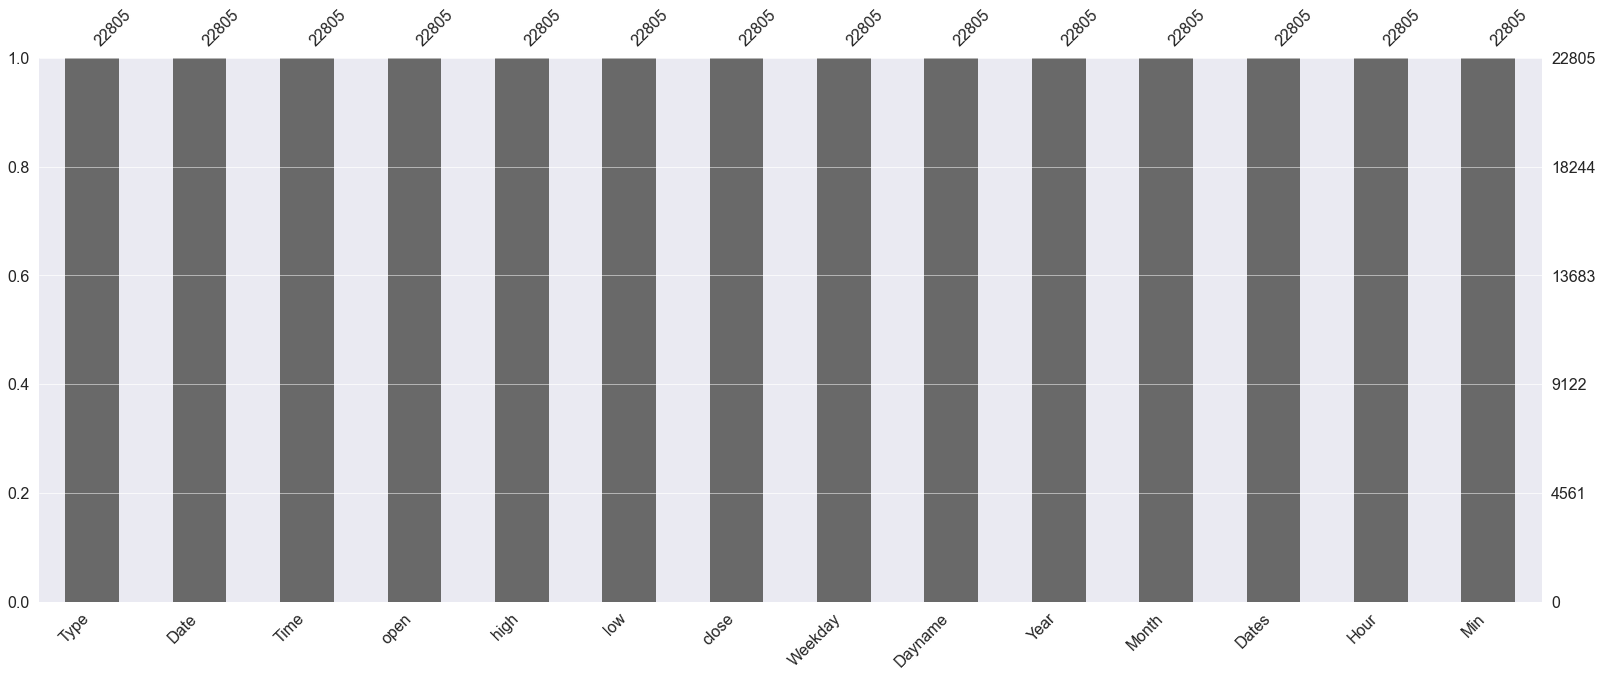

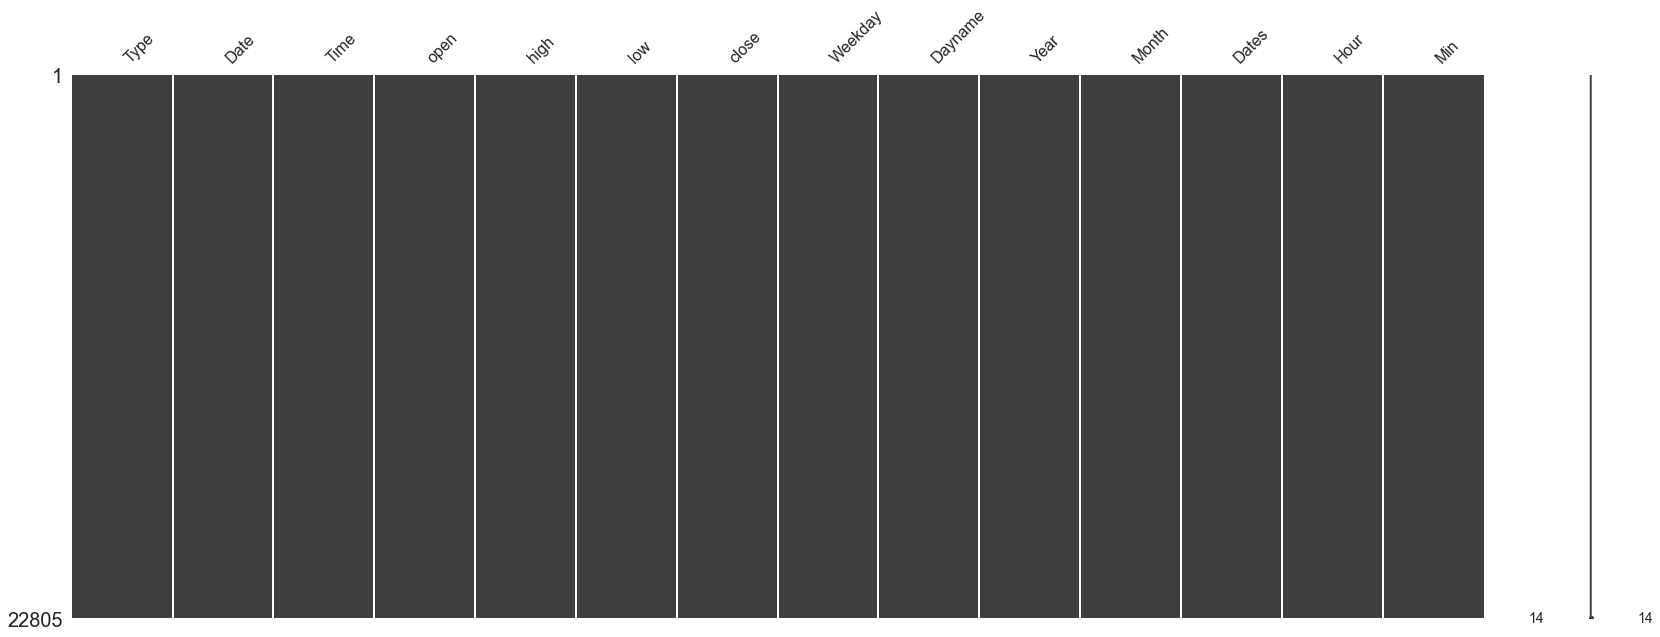

In [233]:
msno.bar(df)
msno.matrix(df)

,open,high,low,close,Weekday
open,1.000000,0.999926,0.999912,0.999837,-0.035856
high,0.999926,1.000000,0.999893,0.999927,-0.035993
low,0.999912,0.999893,1.000000,0.999932,-0.036092
close,0.999837,0.999927,0.999932,1.000000,-0.036100
Weekday,-0.035856,-0.035993,-0.036092,-0.036100,1.000000


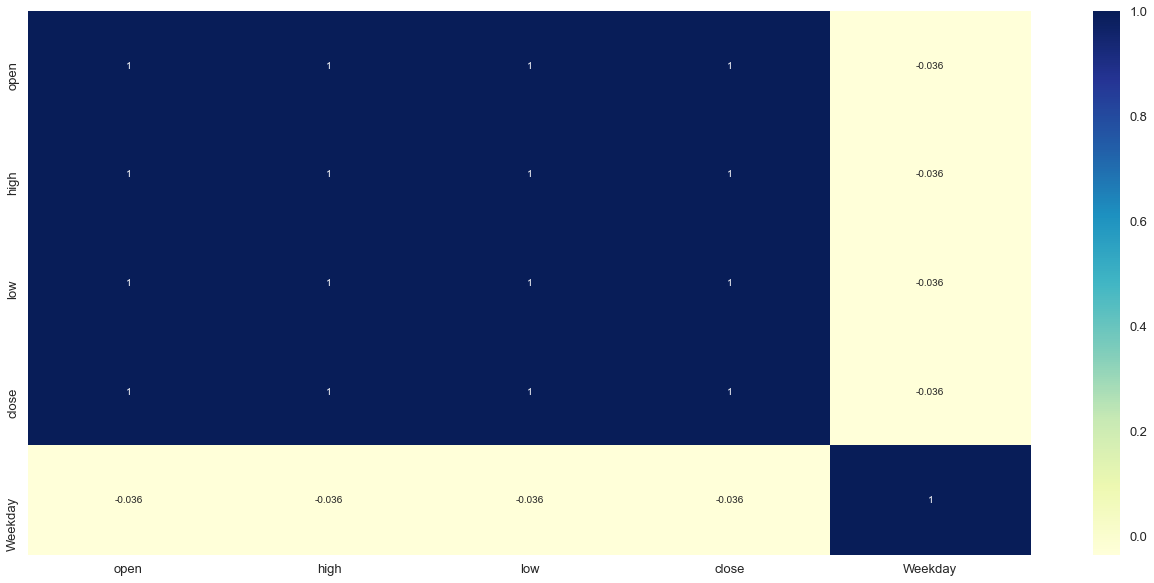

In [234]:
# Finding the relations between the variables.
plt.figure(figsize=(20,10))
c= df.corr()
sns.heatmap(c,cmap='YlGnBu',annot=True)
c

In [235]:
plt.style.use('seaborn-bright')

/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x360 with 0 Axes>

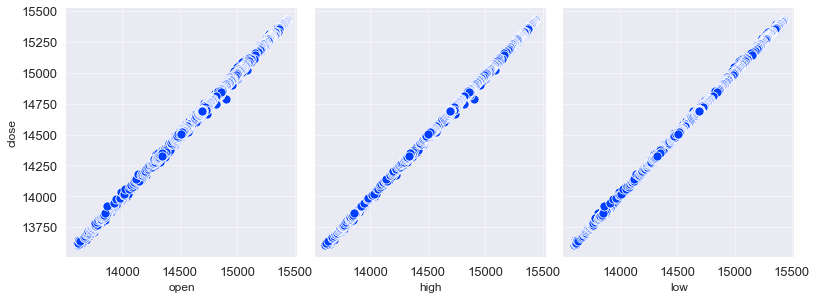

In [236]:
plt.figure(figsize = (10, 5))
sns.pairplot(df,x_vars=['open','high','low'], y_vars=["close"], aspect=0.9, size=4, diag_kind=None)
plt.show()

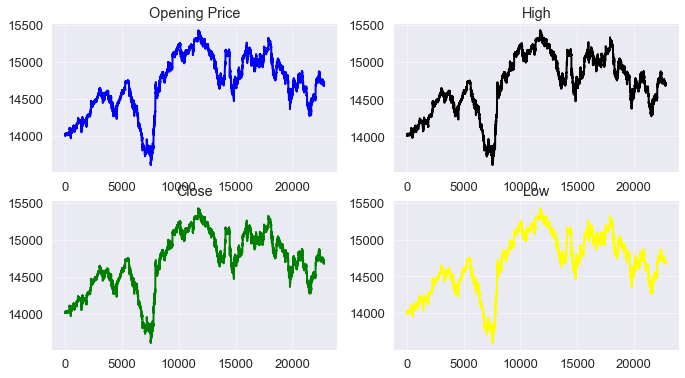

In [237]:
figure, axis = plt.subplots(2, 2,figsize=(10,6))
axis[0, 0].plot(df['open'],color='blue')
axis[0, 0].set_title("Opening Price")
axis[0, 1].plot(df['high'],color='black')
axis[0, 1].set_title("High")
axis[1, 0].plot(df['close'],color='green')
axis[1, 0].set_title("Close")
axis[1, 1].plot(df['low'],color='yellow')
axis[1, 1].set_title("Low")
plt.show()

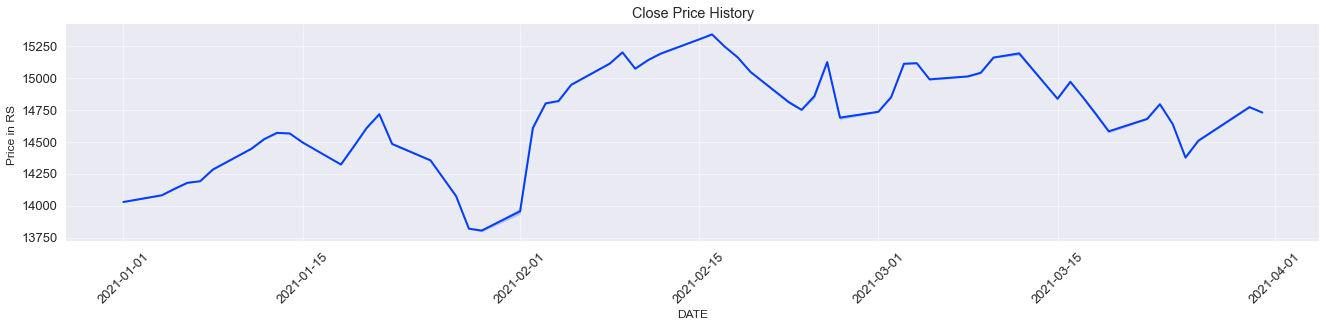

In [238]:
plt.figure(figsize=(20,4))
sns.lineplot(x = df["Date"], y = df["close"], data = df)
plt.title("Close Price History")
plt.xlabel("DATE")
plt.xticks(rotation=45)
plt.ylabel("Price in RS ")
plt.show()

# EDA AND DATA CLEANING - MSFT DATASET 

In [239]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.preprocessing import minmax_scaling
from scipy import stats
%matplotlib inline
import seaborn as sns

In [240]:
df2 = pd.read_csv(r'/Users/apple/Documents/GitHub/Prediction-of-Stock-Price-Movement-based-on-trading-DS-II/Datasets/MSFT.csv')
print(df2.shape)
df2.head()

(8857, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061751,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063956,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.065059,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063405,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.062302,47894400


In [241]:
df2.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [242]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8857 entries, 0 to 8856
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8857 non-null   object 
 1   Open       8857 non-null   float64
 2   High       8857 non-null   float64
 3   Low        8857 non-null   float64
 4   Close      8857 non-null   float64
 5   Adj Close  8857 non-null   float64
 6   Volume     8857 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 484.5+ KB


In [243]:
#statistics of dataset
df2.describe(include='all')

,Date,Open,High,Low,Close,Adj Close,Volume
count,8857,8857.000000,8857.000000,8857.000000,8857.000000,8857.000000,8.857000e+03
unique,8857,NaN,NaN,NaN,NaN,NaN,NaN
top,2020-10-05,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,34.831233,35.209355,34.449657,34.840895,29.886536,5.953411e+07
std,NaN,44.060163,44.513443,43.597704,44.080986,44.195101,3.858121e+07
min,NaN,0.088542,0.092014,0.088542,0.090278,0.057340,2.304000e+06
25%,NaN,3.843750,3.875000,3.812500,3.851563,2.446323,3.559720e+07
50%,NaN,26.590000,26.879999,26.290001,26.590000,18.686628,5.269680e+07
75%,NaN,36.730000,37.000000,36.110001,36.660000,27.218300,7.339520e+07


In [244]:
df2.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [245]:
df2["Weekday"]=pd.to_datetime(df2["Date"].astype("str")).dt.weekday
df2["Dayname"]=pd.to_datetime(df2["Date"].astype("str")).dt.day_name()
year=[]
month=[]
date = []
for i in df2['Date'].astype("str"):
    k=i.strip()
    year.append(k.split("-")[0])
    month.append(k.split("-")[1])
    date.append(k.split("-")[2])

df2["Year"] = year
df2["Month"] = month
df2["Dates"] = date
df2.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Weekday,Dayname,Year,Month,Dates
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061751,1031788800,3,Thursday,1986,03,13
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063956,308160000,4,Friday,1986,03,14
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.065059,133171200,0,Monday,1986,03,17
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063405,67766400,1,Tuesday,1986,03,18
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.062302,47894400,2,Wednesday,1986,03,19


/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x360 with 0 Axes>

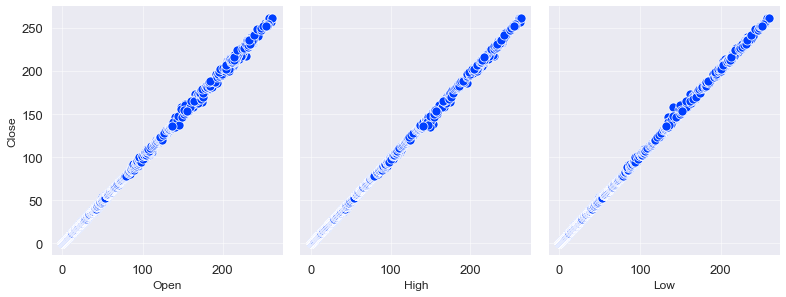

In [246]:
plt.figure(figsize = (10, 5))
sns.pairplot(df2, x_vars=['Open','High','Low'], y_vars=["Close"], aspect=0.9, size=4, diag_kind=None)
plt.show()

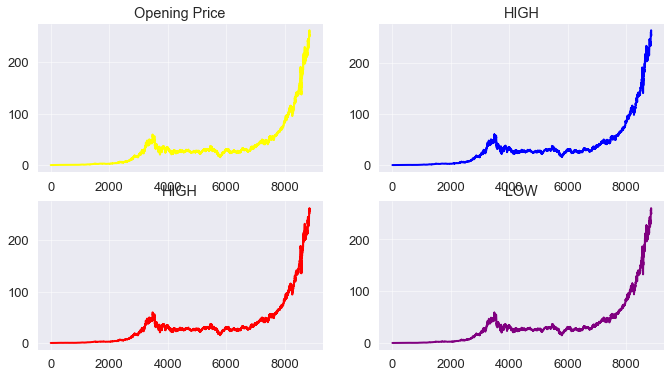

In [247]:
figure, axis = plt.subplots(2, 2,figsize=(10,6))
axis[0, 0].plot(df2['Open'],color='yellow')
axis[0, 0].set_title("Opening Price")
axis[0, 1].plot(df2['High'],color='blue')
axis[0, 1].set_title("HIGH")
axis[1, 0].plot(df2['Close'],color='red')
axis[1, 0].set_title("HIGH")
axis[1, 1].plot(df2['Low'],color='purple')
axis[1, 1].set_title("LOW")
  
# Combine all the operations and display
plt.show()

,open,high,low,close,Weekday
open,1.000000,0.999926,0.999912,0.999837,-0.035856
high,0.999926,1.000000,0.999893,0.999927,-0.035993
low,0.999912,0.999893,1.000000,0.999932,-0.036092
close,0.999837,0.999927,0.999932,1.000000,-0.036100
Weekday,-0.035856,-0.035993,-0.036092,-0.036100,1.000000


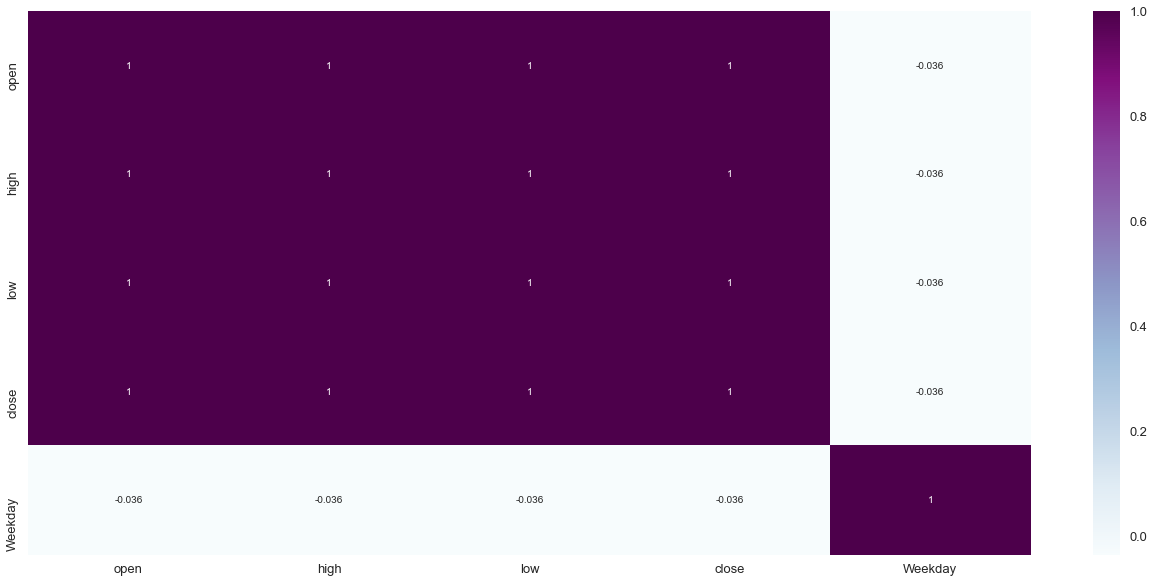

In [248]:
# Finding the relations between the variables.
plt.figure(figsize=(20,10))
c= df.corr()
sns.heatmap(c,cmap='BuPu',annot=True)
c